## 국민연금 연령별·성별·업종별 가입자 현황(총괄)

* http://kosis.kr/statHtml/statHtml.do?orgId=322&tblId=DT_32202_B012&conn_path=I2

### 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 폰트와 시각화 설정

In [2]:
# sns.set(font="Malgun Gothic", rc={"axes.unicode_minus": False})
sns.set(font="AppleGothic", rc={"axes.unicode_minus": False})

### 데이터셋 불러오기

In [3]:
raw = pd.read_csv("data/NPS_연령별_성별_업종별_가입자_현황_총괄.csv", encoding="cp949")
raw.shape

(34, 79)

In [4]:
raw.head()

,업종별(1),성별(1),2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,...,2018.1,2018.2,2018.3,2018.4,2018.5,2018.6,2018.7,2018.8,2018.9,2018.10
0,업종별(1),성별(1),합계,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60세이상
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 79 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   업종별(1)   34 non-null     object
 1   성별(1)    34 non-null     object
 2   2012     34 non-null     object
 3   2012.1   34 non-null     object
 4   2012.2   34 non-null     object
 5   2012.3   34 non-null     object
 6   2012.4   34 non-null     object
 7   2012.5   34 non-null     object
 8   2012.6   34 non-null     object
 9   2012.7   34 non-null     object
 10  2012.8   34 non-null     object
 11  2012.9   34 non-null     object
 12  2012.10  34 non-null     object
 13  2013     34 non-null     object
 14  2013.1   34 non-null     object
 15  2013.2   34 non-null     object
 16  2013.3   34 non-null     object
 17  2013.4   34 non-null     object
 18  2013.5   34 non-null     object
 19  2013.6   34 non-null     object
 20  2013.7   34 non-null     object
 21  2013.8   34 non-null     object
 22  2013

### tidy data 만들기

In [6]:
cols = raw.iloc[0]
cols.index

Index(['업종별(1)', '성별(1)', '2012', '2012.1', '2012.2', '2012.3', '2012.4',
       '2012.5', '2012.6', '2012.7', '2012.8', '2012.9', '2012.10', '2013',
       '2013.1', '2013.2', '2013.3', '2013.4', '2013.5', '2013.6', '2013.7',
       '2013.8', '2013.9', '2013.10', '2014', '2014.1', '2014.2', '2014.3',
       '2014.4', '2014.5', '2014.6', '2014.7', '2014.8', '2014.9', '2014.10',
       '2015', '2015.1', '2015.2', '2015.3', '2015.4', '2015.5', '2015.6',
       '2015.7', '2015.8', '2015.9', '2015.10', '2016', '2016.1', '2016.2',
       '2016.3', '2016.4', '2016.5', '2016.6', '2016.7', '2016.8', '2016.9',
       '2016.10', '2017', '2017.1', '2017.2', '2017.3', '2017.4', '2017.5',
       '2017.6', '2017.7', '2017.8', '2017.9', '2017.10', '2018', '2018.1',
       '2018.2', '2018.3', '2018.4', '2018.5', '2018.6', '2018.7', '2018.8',
       '2018.9', '2018.10'],
      dtype='object')

In [7]:
col_val = cols.values

In [8]:
cols_ = zip(cols.index, cols.values)
cols_

In [9]:
col_merge = []
for i, val in enumerate(cols.index):
    col_rename_val = f"{val},{cols.values[i]}"
    col_merge.append(col_rename_val)

In [10]:
col_merge

['업종별(1),업종별(1)',
 '성별(1),성별(1)',
 '2012,합계',
 '2012.1,18~19세',
 '2012.2,20~24세',
 '2012.3,25~29세',
 '2012.4,30~34세',
 '2012.5,35~39세',
 '2012.6,40~44세',
 '2012.7,45~49세',
 '2012.8,50~54세',
 '2012.9,55~59세',
 '2012.10,60세이상',
 '2013,합계',
 '2013.1,18~19세',
 '2013.2,20~24세',
 '2013.3,25~29세',
 '2013.4,30~34세',
 '2013.5,35~39세',
 '2013.6,40~44세',
 '2013.7,45~49세',
 '2013.8,50~54세',
 '2013.9,55~59세',
 '2013.10,60세이상',
 '2014,합계',
 '2014.1,18~19세',
 '2014.2,20~24세',
 '2014.3,25~29세',
 '2014.4,30~34세',
 '2014.5,35~39세',
 '2014.6,40~44세',
 '2014.7,45~49세',
 '2014.8,50~54세',
 '2014.9,55~59세',
 '2014.10,60세이상',
 '2015,합계',
 '2015.1,18~19세',
 '2015.2,20~24세',
 '2015.3,25~29세',
 '2015.4,30~34세',
 '2015.5,35~39세',
 '2015.6,40~44세',
 '2015.7,45~49세',
 '2015.8,50~54세',
 '2015.9,55~59세',
 '2015.10,60세이상',
 '2016,합계',
 '2016.1,18~19세',
 '2016.2,20~24세',
 '2016.3,25~29세',
 '2016.4,30~34세',
 '2016.5,35~39세',
 '2016.6,40~44세',
 '2016.7,45~49세',
 '2016.8,50~54세',
 '2016.9,55~59세',
 '2016.10,60세이상',
 '2017

In [11]:
raw.columns = col_merge
raw.head()

,"업종별(1),업종별(1)","성별(1),성별(1)","2012,합계","2012.1,18~19세","2012.2,20~24세","2012.3,25~29세","2012.4,30~34세","2012.5,35~39세","2012.6,40~44세","2012.7,45~49세",...,"2018.1,18~19세","2018.2,20~24세","2018.3,25~29세","2018.4,30~34세","2018.5,35~39세","2018.6,40~44세","2018.7,45~49세","2018.8,50~54세","2018.9,55~59세","2018.10,60세이상"
0,업종별(1),성별(1),합계,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,...,18~19세,20~24세,25~29세,30~34세,35~39세,40~44세,45~49세,50~54세,55~59세,60세이상
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485


In [12]:
raw = raw.drop(0)
raw.head()

,"업종별(1),업종별(1)","성별(1),성별(1)","2012,합계","2012.1,18~19세","2012.2,20~24세","2012.3,25~29세","2012.4,30~34세","2012.5,35~39세","2012.6,40~44세","2012.7,45~49세",...,"2018.1,18~19세","2018.2,20~24세","2018.3,25~29세","2018.4,30~34세","2018.5,35~39세","2018.6,40~44세","2018.7,45~49세","2018.8,50~54세","2018.9,55~59세","2018.10,60세이상"
1,계,계,15663881,93201,650194,1643426,2160804,2153176,2497327,2291974,...,80082,788558,1824482,1965045,2505405,2461144,2952025,2796556,2768684,470601
2,계,남자,9268035,44768,237784,859276,1358829,1384033,1540399,1370787,...,41583,326690,952929,1161565,1537137,1452428,1653872,1506643,1487984,169360
3,계,여자,6395846,48433,412410,784150,801975,769143,956928,921187,...,38499,461868,871553,803480,968268,1008716,1298153,1289913,1280700,301241
4,농?임?수렵 및 어업,계,53091,89,718,2352,3561,4487,6757,9181,...,127,1485,3957,4606,6301,6552,9257,12103,16025,2485
5,농?임?수렵 및 어업,남자,42324,58,397,1599,2734,3553,5348,7346,...,94,1059,3029,3537,4860,4960,6890,9003,12138,1739


In [13]:
df = raw.melt(id_vars=["업종별(1),업종별(1)", "성별(1),성별(1)"])
df.head()

,"업종별(1),업종별(1)","성별(1),성별(1)",variable,value
0,계,계,"2012,합계",15663881
1,계,남자,"2012,합계",9268035
2,계,여자,"2012,합계",6395846
3,농?임?수렵 및 어업,계,"2012,합계",53091
4,농?임?수렵 및 어업,남자,"2012,합계",42324


In [14]:
df.head()

,"업종별(1),업종별(1)","성별(1),성별(1)",variable,value
0,계,계,"2012,합계",15663881
1,계,남자,"2012,합계",9268035
2,계,여자,"2012,합계",6395846
3,농?임?수렵 및 어업,계,"2012,합계",53091
4,농?임?수렵 및 어업,남자,"2012,합계",42324


### 컬럼명 변경하기

In [15]:
df.rename(columns={"업종별(1),업종별(1)" : "업종별", 
                   "성별(1),성별(1)":"성별", "value":"가입자 수"})

,업종별,성별,variable,가입자 수
0,계,계,"2012,합계",15663881
1,계,남자,"2012,합계",9268035
2,계,여자,"2012,합계",6395846
3,농?임?수렵 및 어업,계,"2012,합계",53091
4,농?임?수렵 및 어업,남자,"2012,합계",42324
...,...,...,...,...
2536,사회 및 개인서비스업,남자,"2018.10,60세이상",17261
2537,사회 및 개인서비스업,여자,"2018.10,60세이상",36436
2538,분류불능산업,계,"2018.10,60세이상",303442
2539,분류불능산업,남자,"2018.10,60세이상",97499


In [16]:
df.columns = ["업종별", "성별", "variable", "가입자 수"]

In [17]:
df["기간"] = df["variable"].str.split(",", expand=True)[0]
df["연령대"] = df["variable"].str.split(",", expand=True)[1]

In [18]:
df.head()

,업종별,성별,variable,가입자 수,기간,연령대
0,계,계,"2012,합계",15663881,2012,합계
1,계,남자,"2012,합계",9268035,2012,합계
2,계,여자,"2012,합계",6395846,2012,합계
3,농?임?수렵 및 어업,계,"2012,합계",53091,2012,합계
4,농?임?수렵 및 어업,남자,"2012,합계",42324,2012,합계


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2541 entries, 0 to 2540
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   업종별       2541 non-null   object
 1   성별        2541 non-null   object
 2   variable  2541 non-null   object
 3   가입자 수     2541 non-null   object
 4   기간        2541 non-null   object
 5   연령대       2541 non-null   object
dtypes: object(6)
memory usage: 119.2+ KB


In [20]:
df["연도"] = df["기간"].str.split(".", expand=True)[0]
df["월"] = df["기간"].str.split(".", expand=True)[1]

In [21]:
df = df.drop(["variable"], axis=1)
df.head()

,업종별,성별,가입자 수,기간,연령대,연도,월
0,계,계,15663881,2012,합계,2012,None
1,계,남자,9268035,2012,합계,2012,None
2,계,여자,6395846,2012,합계,2012,None
3,농?임?수렵 및 어업,계,53091,2012,합계,2012,None
4,농?임?수렵 및 어업,남자,42324,2012,합계,2012,None


In [22]:
df["가입자 수"] = df["가입자 수"].replace("-", np.nan)
df["가입자 수"] = df["가입자 수"].astype(float)

In [23]:
df["시기"] = pd.to_datetime(df["기간"] + ".1")

### 기간별 전체 가입자 수

In [24]:
df_year = df[(df["업종별"] == "계") &
            (df["성별"] == "계") &
            (df["연령대"] == "합계")]
df_year

,업종별,성별,가입자 수,기간,연령대,연도,월,시기
0,계,계,15663881.0,2012,합계,2012,None,2012-01-01
363,계,계,16169339.0,2013,합계,2013,None,2013-01-01
726,계,계,16554121.0,2014,합계,2014,None,2014-01-01
1089,계,계,17056789.0,2015,합계,2015,None,2015-01-01
1452,계,계,17659255.0,2016,합계,2016,None,2016-01-01
1815,계,계,17998055.0,2017,합계,2017,None,2017-01-01
2178,계,계,18612582.0,2018,합계,2018,None,2018-01-01


In [25]:
year_count = df_year[["연도", "가입자 수"]]
year_count = year_count.set_index("연도")
year_count

,가입자 수
연도,
2012,15663881.0
2013,16169339.0
2014,16554121.0
2015,17056789.0
2016,17659255.0
2017,17998055.0
2018,18612582.0


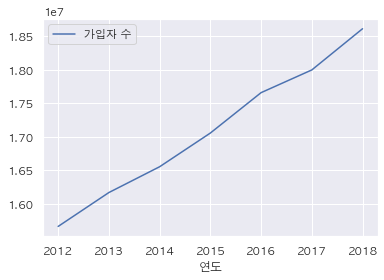

In [26]:
year_count.plot()

### 기간별 전체 가입자 수

In [27]:
df_year_month = df[(df["업종별"] != "계") &
            (df["성별"] != "계") &
            (df["연령대"] != "합계")]
df_year_month

,업종별,성별,가입자 수,기간,연령대,연도,월,시기
37,농?임?수렵 및 어업,남자,58.0,2012.1,18~19세,2012,1,2012-01-01
38,농?임?수렵 및 어업,여자,31.0,2012.1,18~19세,2012,1,2012-01-01
40,광업,남자,17.0,2012.1,18~19세,2012,1,2012-01-01
41,광업,여자,15.0,2012.1,18~19세,2012,1,2012-01-01
43,제조업,남자,18357.0,2012.1,18~19세,2012,1,2012-01-01
...,...,...,...,...,...,...,...,...
2534,금융?보험?부동산 및 사업서비스업,여자,23831.0,2018.10,60세이상,2018,10,2018-10-01
2536,사회 및 개인서비스업,남자,17261.0,2018.10,60세이상,2018,10,2018-10-01
2537,사회 및 개인서비스업,여자,36436.0,2018.10,60세이상,2018,10,2018-10-01
2539,분류불능산업,남자,97499.0,2018.10,60세이상,2018,10,2018-10-01


Text(0.5, 1.0, '시기별 가입자 수')

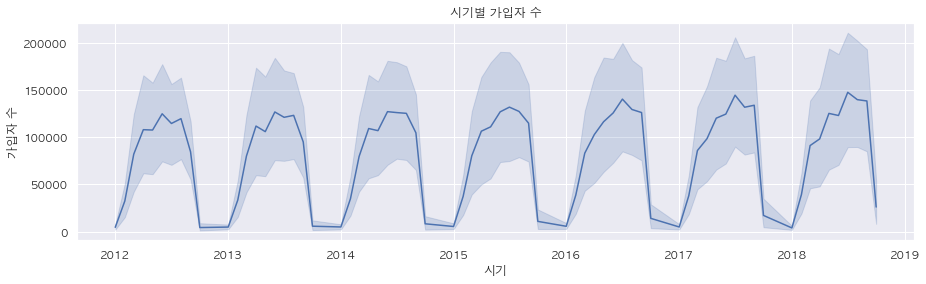

In [28]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_year_month, x="시기", y="가입자 수").set_title("시기별 가입자 수")

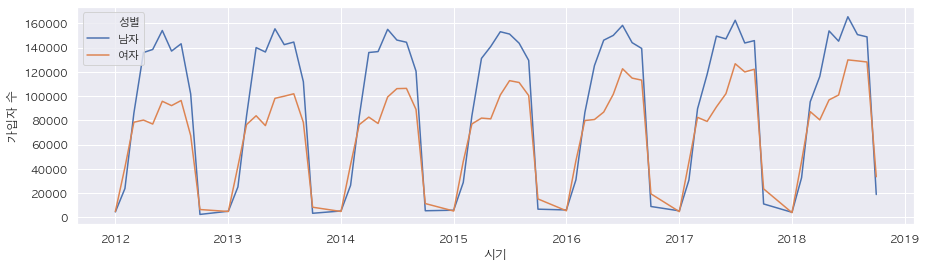

In [29]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_year_month, x="시기", y="가입자 수", hue="성별", ci=None)
plt.legend(loc=2)

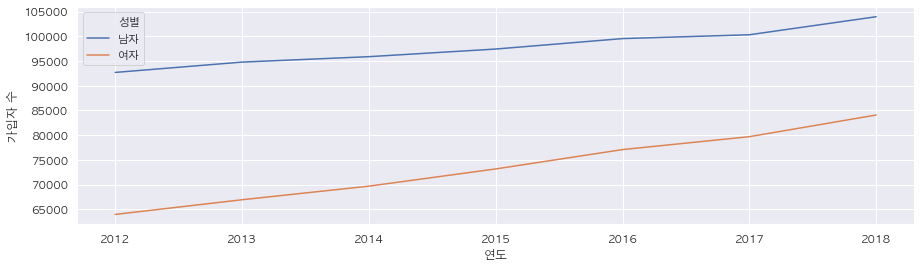

In [30]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_year_month, x="연도", y="가입자 수", hue="성별", ci=None)
plt.legend(loc=2)

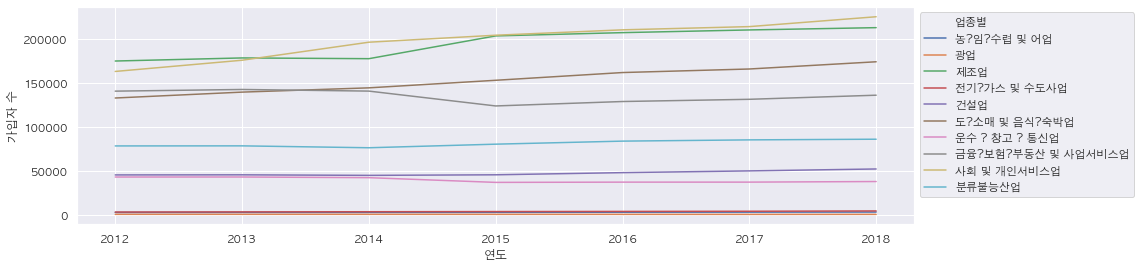

In [31]:
plt.figure(figsize=(15,4))
sns.lineplot(data=df_year_month, x="연도", y="가입자 수", hue="업종별", ci=None)
plt.legend(bbox_to_anchor=(1, 1))

<Figure size 1080x288 with 0 Axes>

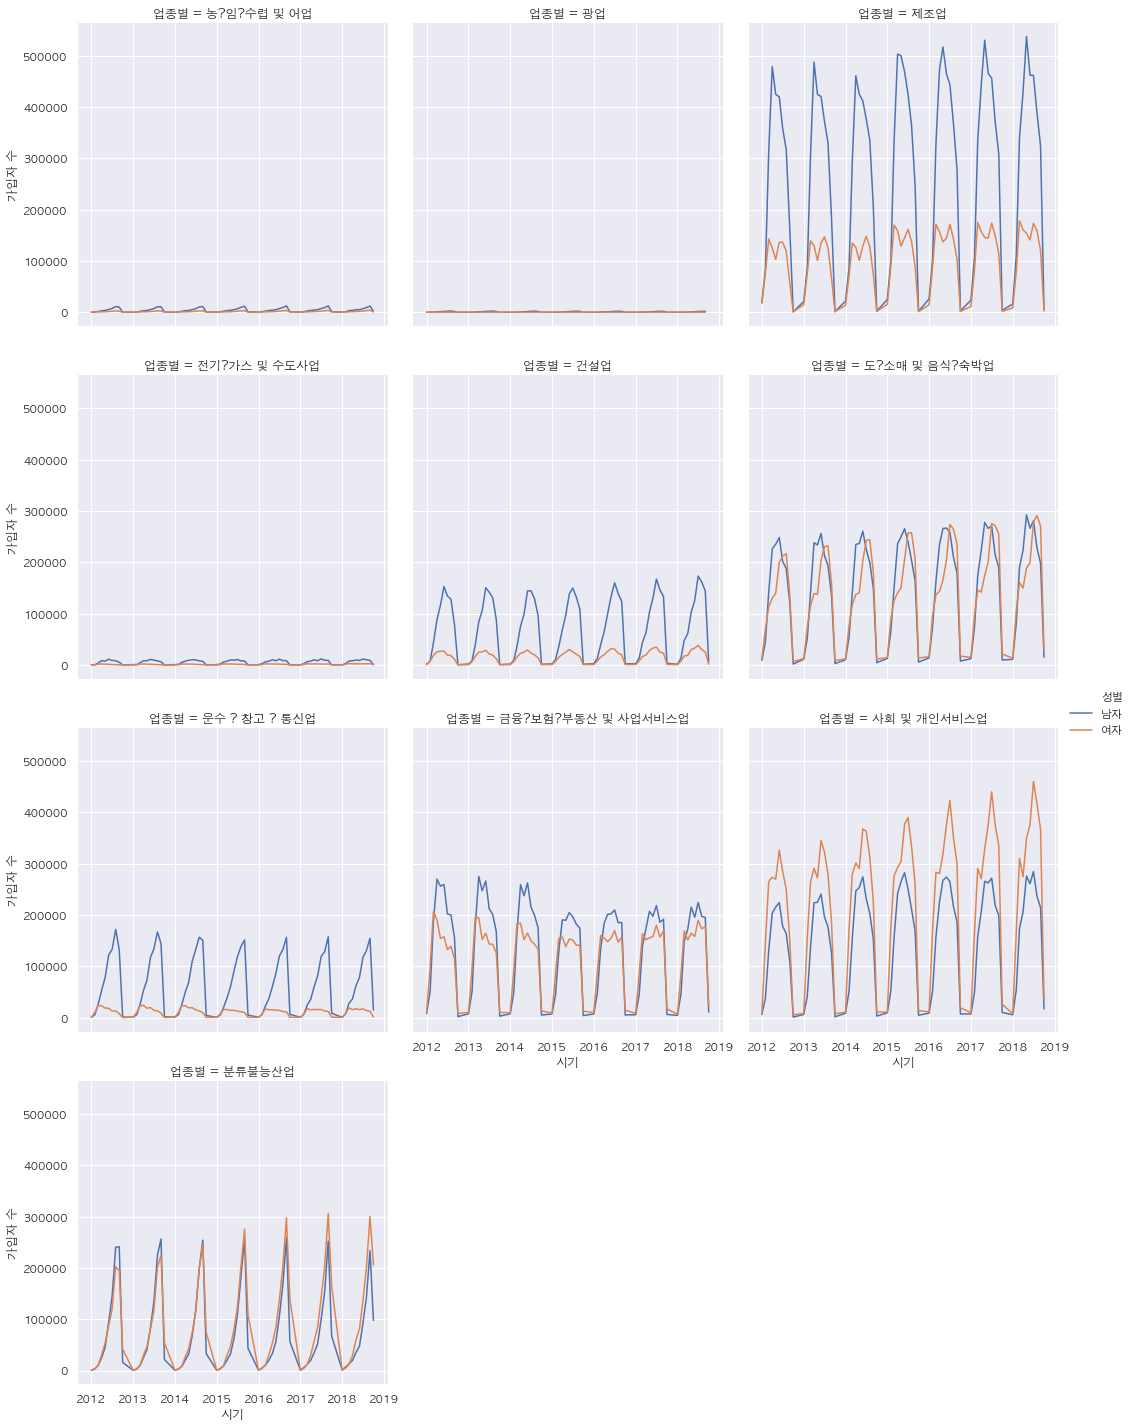

In [32]:
plt.figure(figsize=(15,4))
sns.relplot(data=df_year_month, x="시기", y="가입자 수", hue="성별", 
            ci=None, col="업종별", col_wrap=3, kind="line")

<Figure size 1080x288 with 0 Axes>

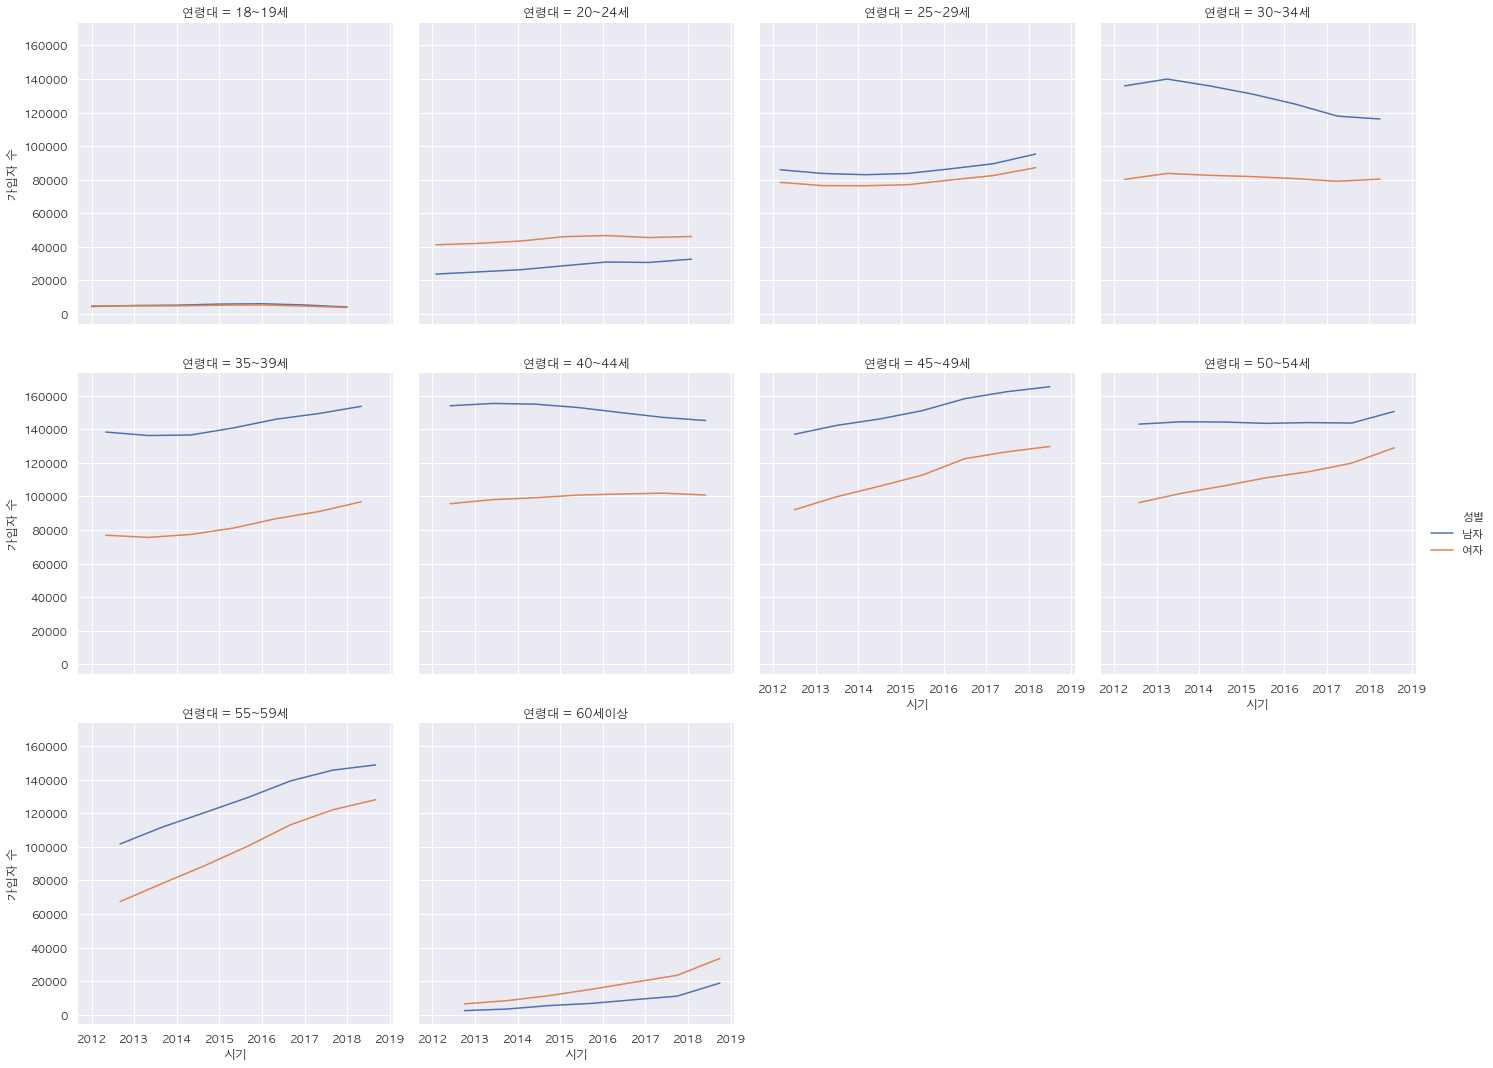

In [33]:
plt.figure(figsize=(15,4))
sns.relplot(data=df_year_month, x="시기", y="가입자 수", hue="성별", 
            ci=None, col="연령대", col_wrap=4, kind="line")

<Figure size 1080x288 with 0 Axes>

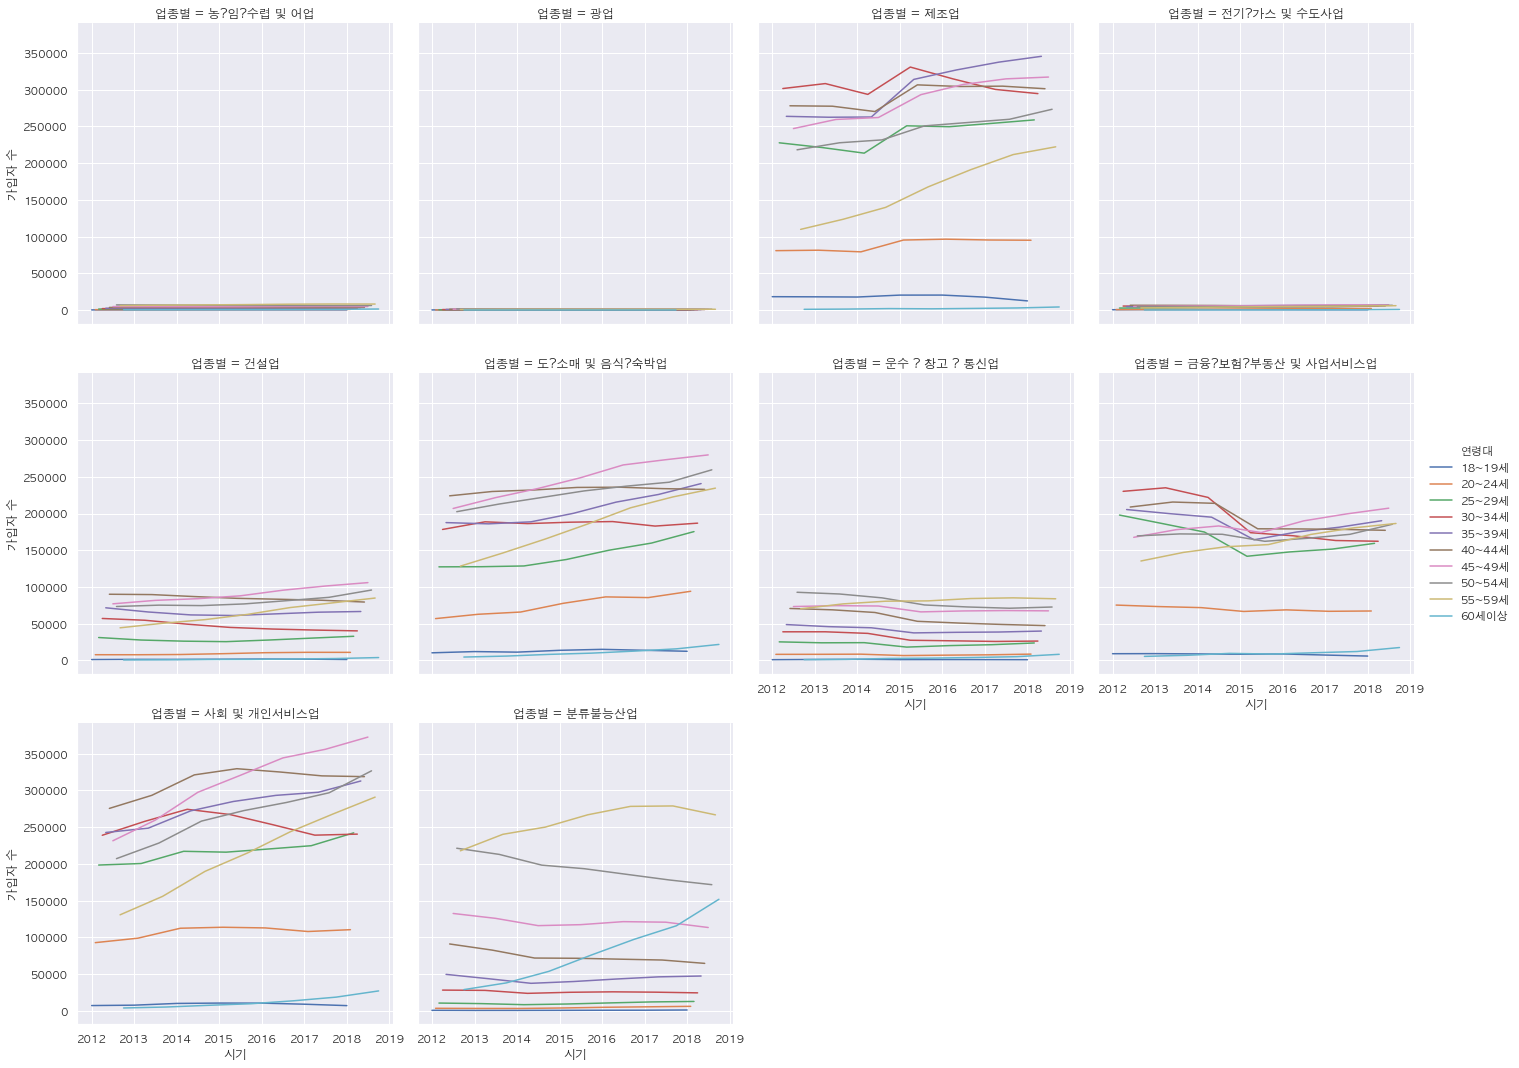

In [34]:
plt.figure(figsize=(15,4))
sns.relplot(data=df_year_month, x="시기", y="가입자 수", hue="연령대", 
            ci=None, col="업종별", col_wrap=4, kind="line")

In [35]:
df_year_month.groupby(["연도", "업종별"])["가입자 수"].mean().unstack()

업종별,건설업,광업,금융?보험?부동산 및 사업서비스업,농?임?수렵 및 어업,도?소매 및 음식?숙박업,분류불능산업,사회 및 개인서비스업,운수 ? 창고 ? 통신업,전기?가스 및 수도사업,제조업
연도,,,,,,,,,,
2012,45294.55,532.650000,140413.35,2654.55,132628.55,78211.50,162786.15,42895.25,3158.70,174618.80
2013,45408.65,529.900000,142317.65,2704.40,139315.95,78296.30,175519.45,42928.35,3317.45,178128.85
2014,44784.70,516.350000,140468.85,2714.35,144162.85,76137.20,195982.70,42166.05,3490.45,177282.55
2015,45430.55,481.900000,123607.65,2790.90,152756.15,80211.25,203924.10,36814.10,3676.80,203146.05
2016,47881.10,472.900000,128641.30,2940.15,161537.45,83668.00,210034.25,37096.30,3843.90,206847.40
2017,49862.90,445.400000,131155.25,3035.55,165566.40,85084.15,213691.40,37112.75,4033.70,209915.25
2018,52043.80,477.722222,135812.75,3144.90,173770.70,85837.95,224899.45,37784.55,4394.30,212510.75


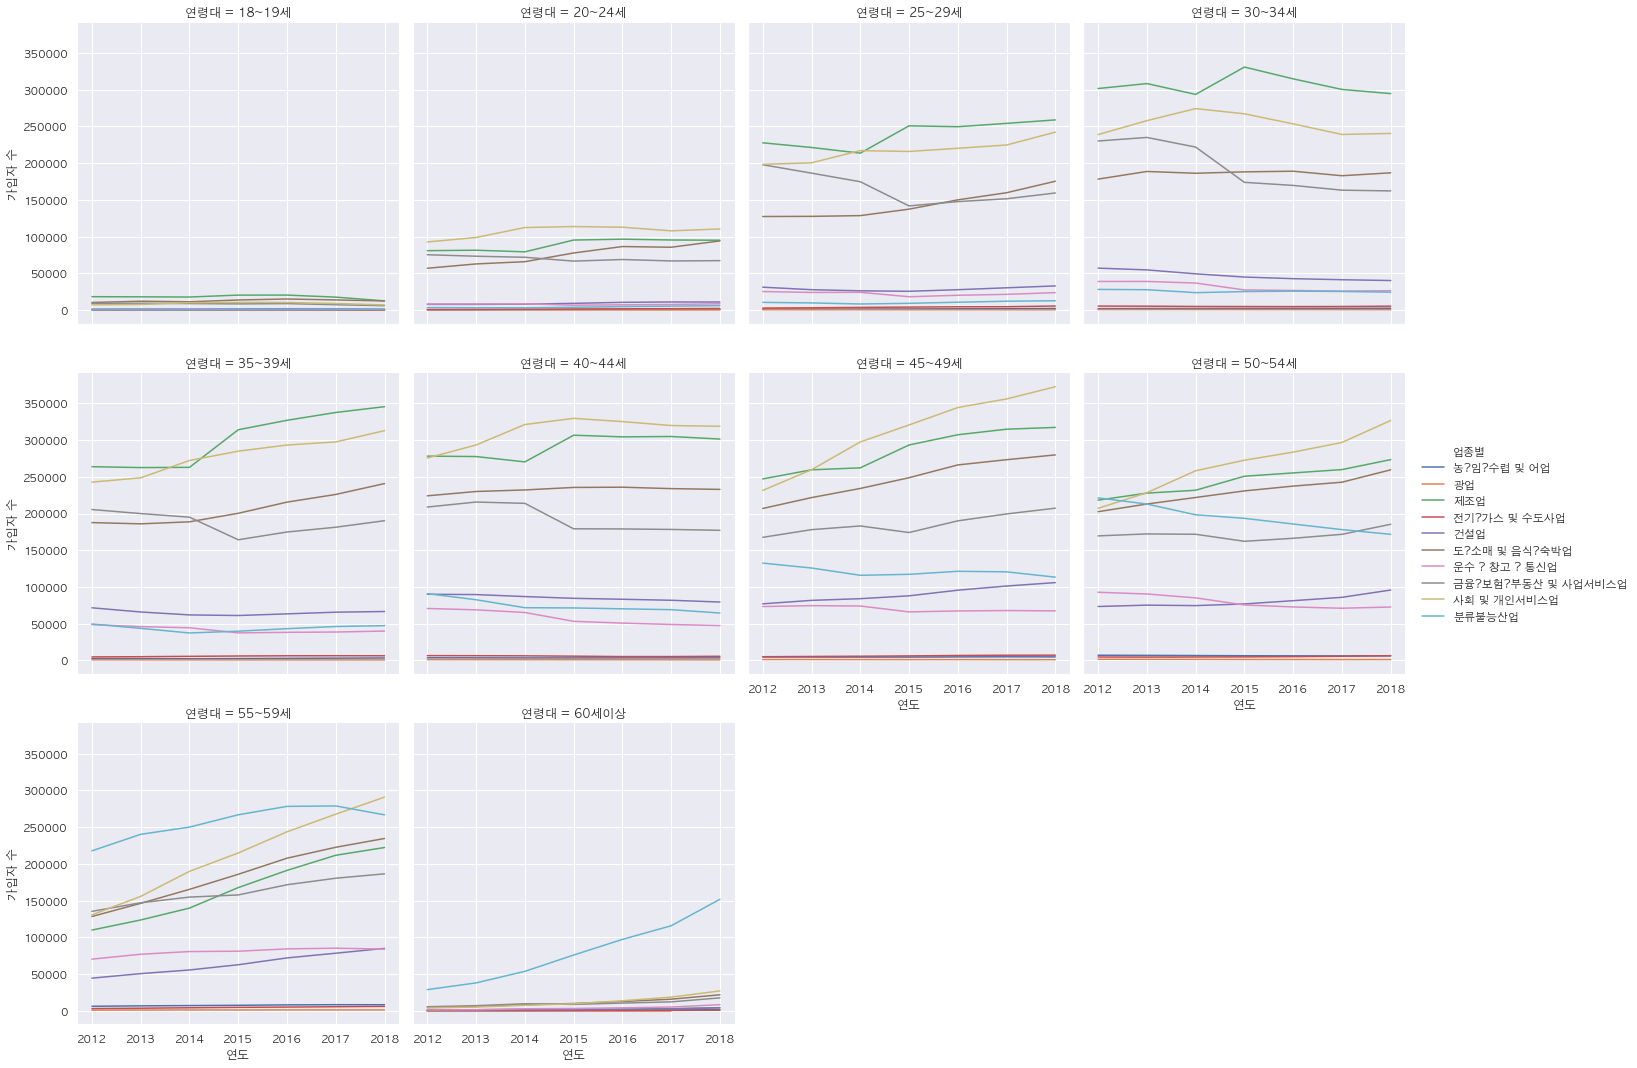

In [36]:
sns.relplot(data=df_year_month, x="연도", y="가입자 수", 
            col="연령대", hue="업종별", ci=None, 
            col_wrap=4, kind="line")

In [37]:
df_service = df_year_month[df_year_month["업종별"] == "사회 및 개인서비스업"]
df_service.head()

,업종별,성별,가입자 수,기간,연령대,연도,월,시기
61,사회 및 개인서비스업,남자,6263.0,2012.1,18~19세,2012,1,2012-01-01
62,사회 및 개인서비스업,여자,7548.0,2012.1,18~19세,2012,1,2012-01-01
94,사회 및 개인서비스업,남자,38273.0,2012.2,20~24세,2012,2,2012-02-01
95,사회 및 개인서비스업,여자,146987.0,2012.2,20~24세,2012,2,2012-02-01
127,사회 및 개인서비스업,남자,131246.0,2012.3,25~29세,2012,3,2012-03-01


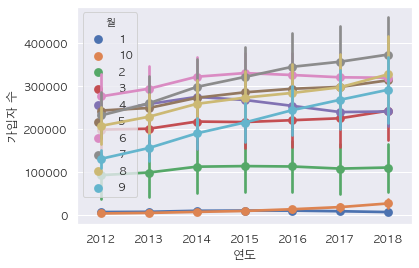

In [38]:
sns.pointplot(data=df_service, x="연도", y="가입자 수", hue="월")

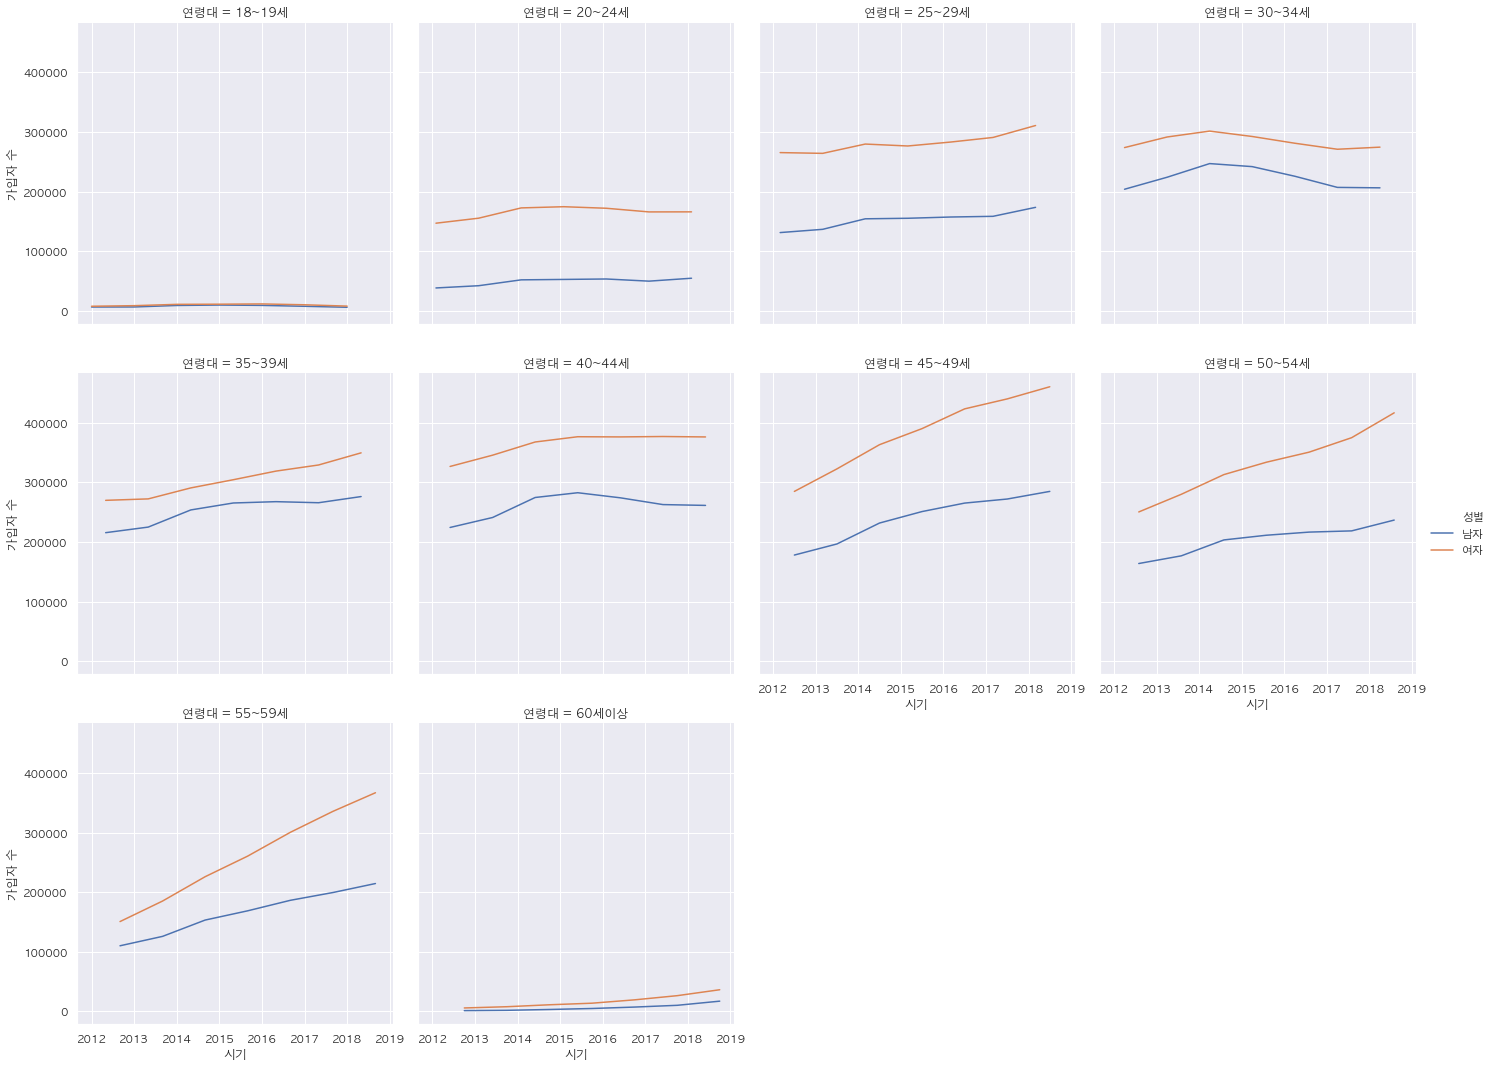

In [39]:
sns.relplot(data=df_service, x="시기", y="가입자 수", 
            col="연령대", hue="성별", 
            kind="line", col_wrap=4)

In [40]:
df_year_month["업종별"].unique()

array(['농?임?수렵 및 어업', '광업', '제조업', '전기?가스 및 수도사업', '건설업', '도?소매 및 음식?숙박업',
       '운수 ? 창고 ? 통신업', '금융?보험?부동산 및 사업서비스업', '사회 및 개인서비스업', '분류불능산업'],
      dtype=object)

In [41]:
df_finace = df_year_month[df_year_month["업종별"] == "금융?보험?부동산 및 사업서비스업"]
df_finace.head()

,업종별,성별,가입자 수,기간,연령대,연도,월,시기
58,금융?보험?부동산 및 사업서비스업,남자,7921.0,2012.1,18~19세,2012,1,2012-01-01
59,금융?보험?부동산 및 사업서비스업,여자,9965.0,2012.1,18~19세,2012,1,2012-01-01
91,금융?보험?부동산 및 사업서비스업,남자,51551.0,2012.2,20~24세,2012,2,2012-02-01
92,금융?보험?부동산 및 사업서비스업,여자,98894.0,2012.2,20~24세,2012,2,2012-02-01
124,금융?보험?부동산 및 사업서비스업,남자,188552.0,2012.3,25~29세,2012,3,2012-03-01


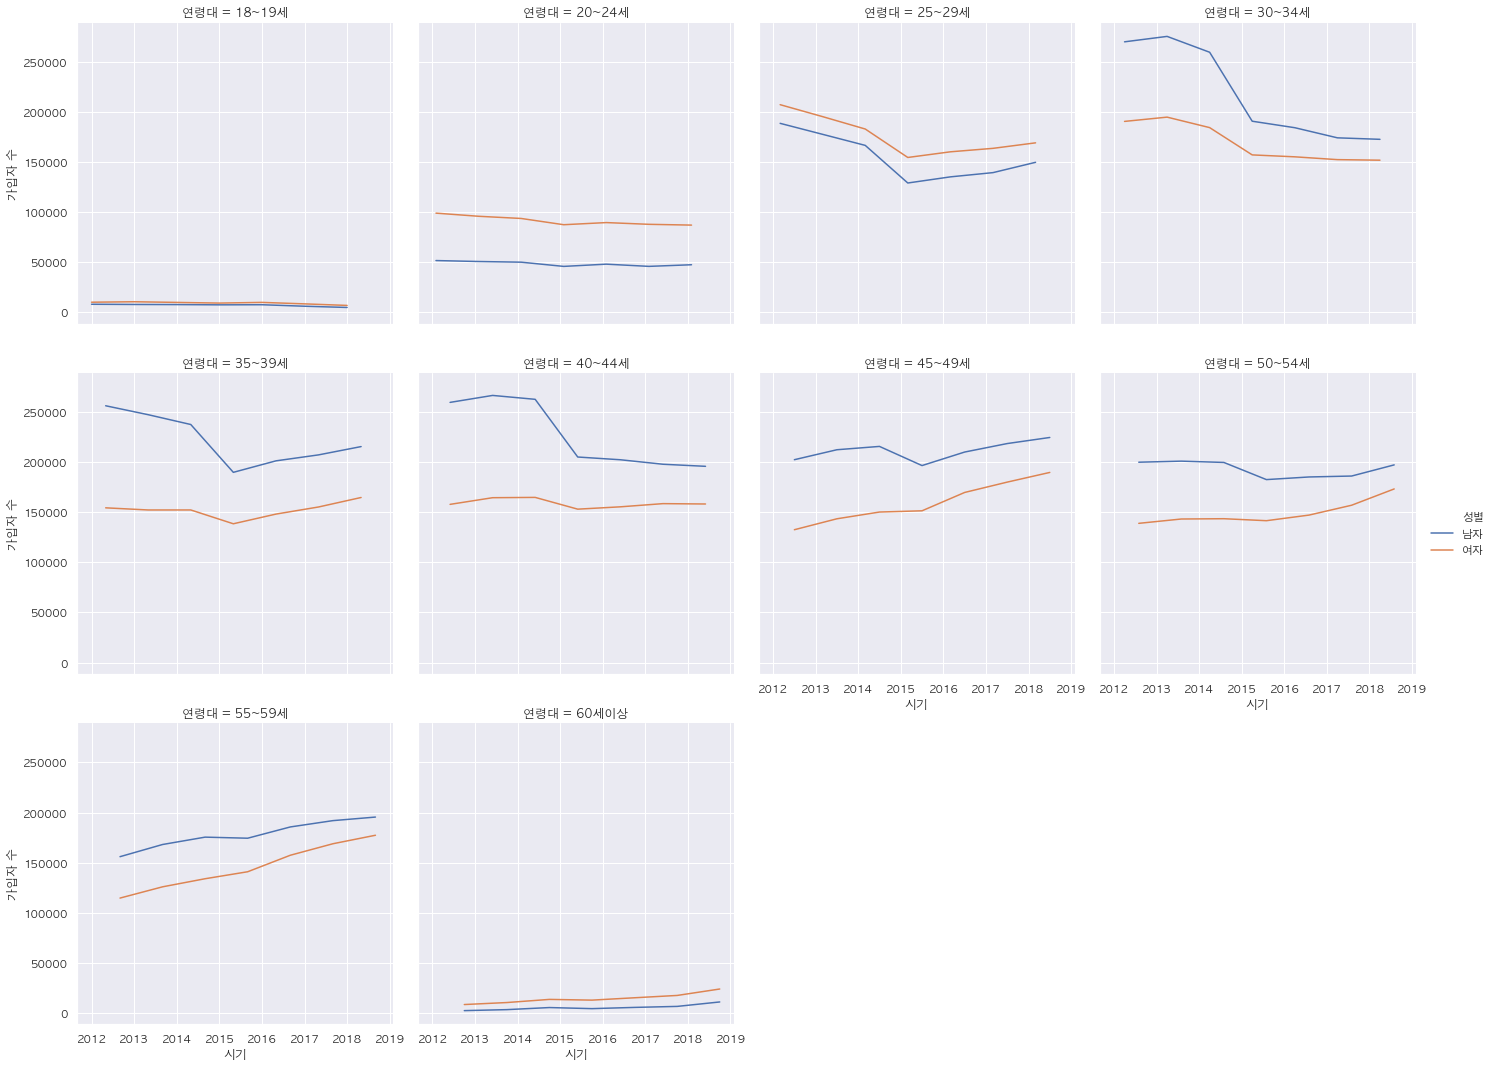

In [42]:
sns.relplot(data=df_finace, x="시기", y="가입자 수", 
            col="연령대", hue="성별", 
            kind="line", col_wrap=4)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

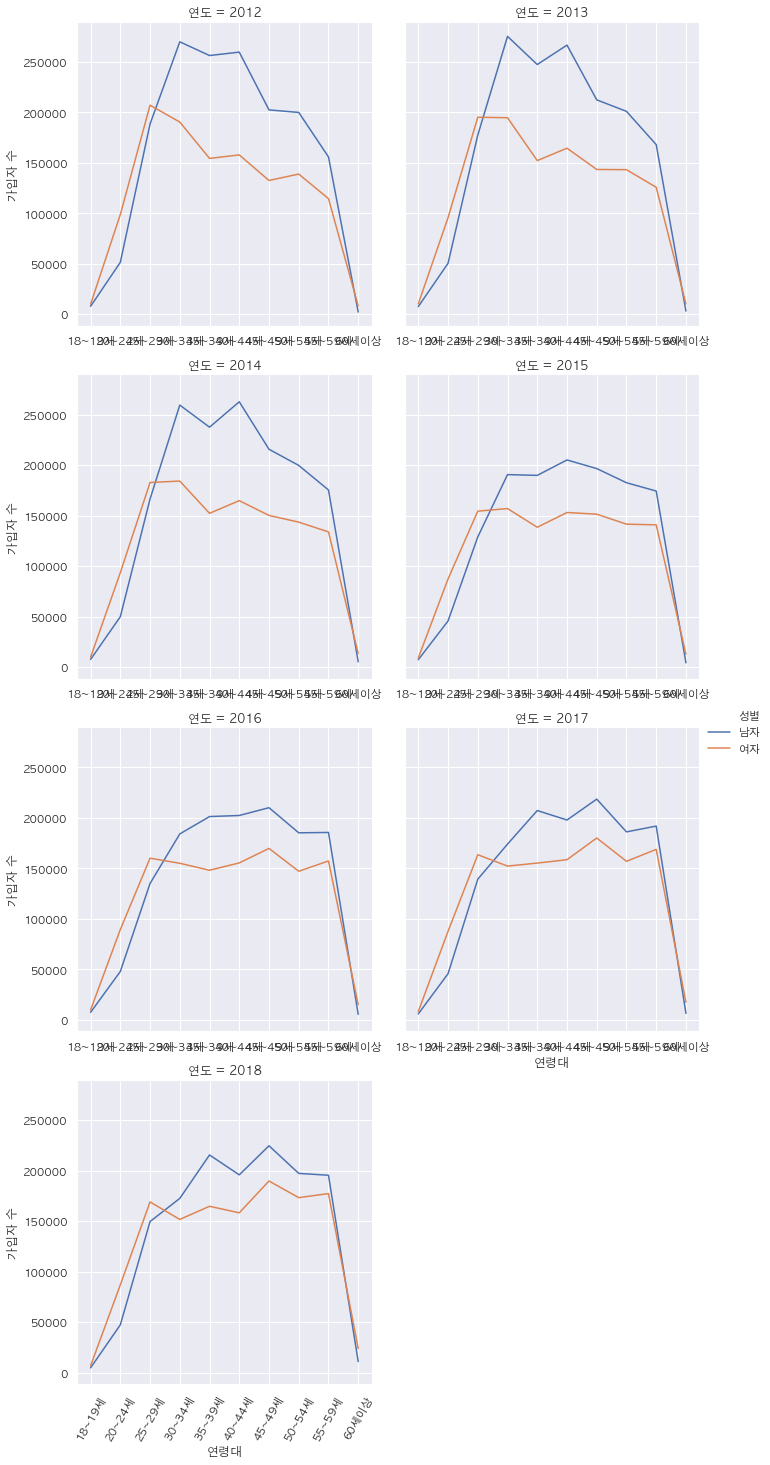

In [43]:
# 금융?보험?부동산 및 사업서비스업
g = sns.relplot(data=df_finace, x="연령대", y="가입자 수", 
            col="연도", hue="성별", 
            kind="line", col_wrap=2, facet_kws={"sharex": False})
plt.xticks(rotation=60)

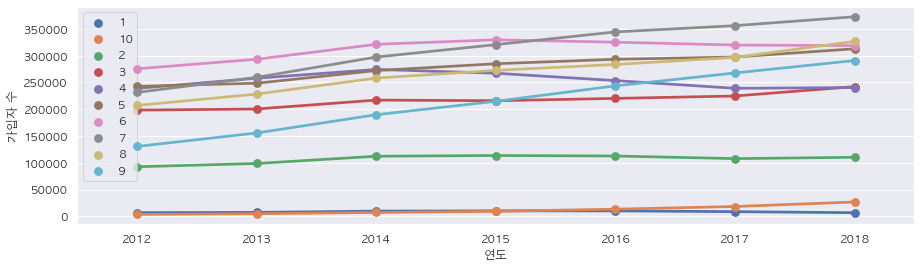

In [44]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_service, x="연도", y="가입자 수", hue="월", ci=None)
plt.legend(loc=2)

In [45]:
df_year_month["월"].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'], dtype=object)